In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -Uqq fastbook
!pip install -Uqq fastai


     |████████████████████████████████| 720 kB 4.5 MB/s 
     |████████████████████████████████| 189 kB 40.2 MB/s 
     |████████████████████████████████| 1.2 MB 39.4 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 262 kB/s 


In [ ]:
import os
import shutil

In [ ]:
zip_file_path = "/content/drive/MyDrive/Colab Notebooks/pathshala/sorted/bangla/capital/lekha_1.zip"
output_path = "/content/capital"
shutil.unpack_archive(zip_file_path,output_path)

In [ ]:
import torch
import numpy as np
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai import *
from fastcore import *

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock, DataLoaders
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, RegexLabeller

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.metrics import error_rate, accuracy

from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageDataLoaders, ImageBlock
from fastai.vision.learner import cnn_learner

In [ ]:
from torchvision.models import mobilenet_v3_small

In [ ]:
imgs_path = Path(output_path)

In [ ]:
fnames = get_image_files(imgs_path)

In [ ]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0,do_flip=False), Normalize.from_stats(*imagenet_stats)]
bs=64

In [ ]:
def ret_cat(x):
    return int(x[0:2])

In [ ]:
dls = ImageDataLoaders.from_name_func(
    imgs_path, fnames, 
    valid_pct=0.2, seed=307,bs = bs,
    label_func=ret_cat, 
    item_tfms=item_tfms,batch_tfms=batch_tfms)

In [ ]:
imgs_path.ls()

(#77167) [Path('/content/capital/10_02_0002_1_19_1016_0660_22.png'),Path('/content/capital/03_01_0001_0_17_0916_0043_15.png'),Path('/content/capital/04_02_0002_0_19_1016_1558_16.png'),Path('/content/capital/24_01_0001_1_11_0916_1940_36.png'),Path('/content/capital/10_01_0001_1_17_0916_0342_22.png'),Path('/content/capital/00_01_0001_0_17_0916_0182_12.png'),Path('/content/capital/12_02_0002_0_17_1016_1423_24.png'),Path('/content/capital/06_02_0002_0_24_1016_1357_18.png'),Path('/content/capital/26_02_0002_0_20_1016_0785_38.png'),Path('/content/capital/18_02_0002_0_23_1016_1832_30.png')...]

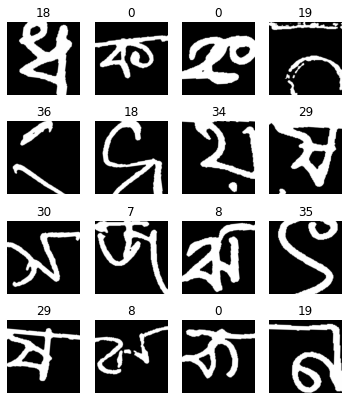

In [ ]:
dls.show_batch(max_n=16, figsize=(6,7))

In [ ]:
type(dls.valid_ds)

fastai.data.core.Datasets

In [ ]:
dls.valid_ds

(#15433) [(PILImage mode=RGB size=384x384, TensorCategory(28)),(PILImage mode=RGB size=384x384, TensorCategory(26)),(PILImage mode=RGB size=384x384, TensorCategory(15)),(PILImage mode=RGB size=384x384, TensorCategory(35)),(PILImage mode=RGB size=384x384, TensorCategory(32)),(PILImage mode=RGB size=384x384, TensorCategory(18)),(PILImage mode=RGB size=384x384, TensorCategory(24)),(PILImage mode=RGB size=384x384, TensorCategory(8)),(PILImage mode=RGB size=384x384, TensorCategory(29)),(PILImage mode=RGB size=384x384, TensorCategory(4))...]

In [ ]:
learn = cnn_learner(dls, mobilenet_v3_small, pretrained=True, metrics=[error_rate,accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.862679,0.547799,0.164971,0.835029,11:07
1,0.474176,0.339098,0.100629,0.899372,11:08
2,0.378630,0.268813,0.077367,0.922633,11:04
3,0.340662,0.240384,0.070433,0.929567,11:05
4,0.299212,0.236618,0.069915,0.930085,11:18


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.334019,0.262082,0.078403,0.921597,11:21
1,0.325148,0.254051,0.074840,0.925160,11:12
2,0.300663,0.227417,0.067647,0.932353,11:12
3,0.255589,0.211580,0.060844,0.939156,11:11
4,0.225916,0.208615,0.060455,0.939545,11:14


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.256811,0.235654,0.066351,0.933649,11:14
1,0.266504,0.228143,0.065444,0.934556,11:16


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.256811,0.235654,0.066351,0.933649,11:14
1,0.266504,0.228143,0.065444,0.934556,11:16
2,0.282017,0.217785,0.062982,0.937018,11:14
3,0.219272,0.198917,0.056243,0.943757,11:12
4,0.196622,0.196769,0.057021,0.942979,11:15


In [25]:
model_save_path = Path("/content/drive/MyDrive/Colab Notebooks/pathshala/models/bangla/capital/capital_lekha_1")

In [26]:
learn.save(model_save_path)

Path('/content/drive/MyDrive/Colab Notebooks/pathshala/models/bangla/capital/capital_lekha_1.pth')

In [ ]:
torch.save(learn.model.state_dict(), '/content/save/stage_1.pt')

In [ ]:
learn.load('/content/save/stage_1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=3)

In [ ]:
!pwd

/content


In [ ]:
learn.lr_find()

IndexError: ignored

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-7, 1e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.020158,0.020310,0.005247,0.994753,08:59
1,0.022252,0.020395,0.005157,0.994843,08:10
2,0.014564,0.020347,0.005247,0.994753,08:12
3,0.017116,0.020168,0.004976,0.995024,08:09


In [ ]:
state_dict = torch.load("/content/save/stage_1.pt")

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): ConvBNActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): ConvBNActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (relu): ReLU(inplace=True)
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          )
          (2): ConvBNActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [ ]:
model.load_state_dict(state_dict['model'])

RuntimeError: ignored

In [ ]:
state_dict['opt']

{'hypers': (#2) [{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 1.001474604547109e-08, 'mom': 0.9499999985253806, 'eps': 1e-05},{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 1.001474604547109e-08, 'mom': 0.9499999985253806, 'eps': 1e-05}],
 'state': [{},
  {'do_wd': False,
   'force_train': True,
   'grad_avg': tensor([-8.2547e-04,  3.6876e-05,  8.7586e-05, -3.5376e-06,  1.5758e-04,
            3.3469e-04, -1.0304e-03, -1.1104e-02,  1.9298e-03, -8.9862e-04,
            4.0164e-04, -1.4041e-06,  1.1360e-03, -1.1496e-02,  3.4168e-03,
           -1.4899e-05], device='cuda:0'),
   'sqr_avg': tensor([8.3719e-05, 6.3871e-06, 1.3021e-05, 1.6251e-07, 8.0835e-06, 3.0281e-05,
           3.3318e-04, 1.7828e-02, 1.3159e-04, 3.6181e-05, 2.2890e-05, 3.6307e-10,
           1.0591e-04, 3.2272e-03, 3.0405e-03, 1.8269e-07], device='cuda:0'),
   'step': 17241},
  {'do_wd': False,
   'force_train': True,
   'grad_avg': tensor([ 6.4115e-05,  2.8451e-05,  2.1191e-04,  4.2614e-06,  3.1820e-05,
           -3.3782e-04,  4.9521e-04